In [35]:
import awkward as ak
import seaborn as sns
import numpy as np

In [36]:
c3p3 = ak.from_parquet('data/c3p3.parquet')
c3p12 = ak.from_parquet('data/c3p12.parquet')

In [37]:
c3p3.fields

['ideal_cand',
 'cand_regret',
 'likability',
 'issues',
 'cov_matrix',
 'pl_h',
 'pl_s',
 'range_10_h',
 'range_10_s',
 'aprv_h',
 'aprv_s']

In [38]:
all_posns_c3p3 = ak.flatten(c3p3.issues, axis=1)
all_posns_c3p12 = ak.flatten(c3p12.issues, axis=1)

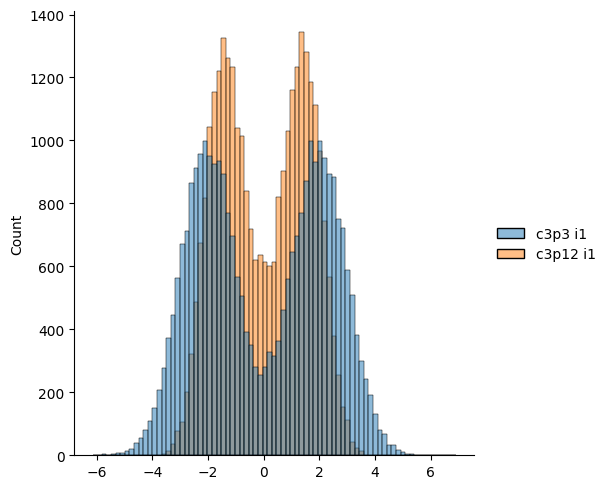

In [39]:
sns.displot({'c3p3 i1': all_posns_c3p3[:,0], 'c3p12 i1': all_posns_c3p12[:,0]})

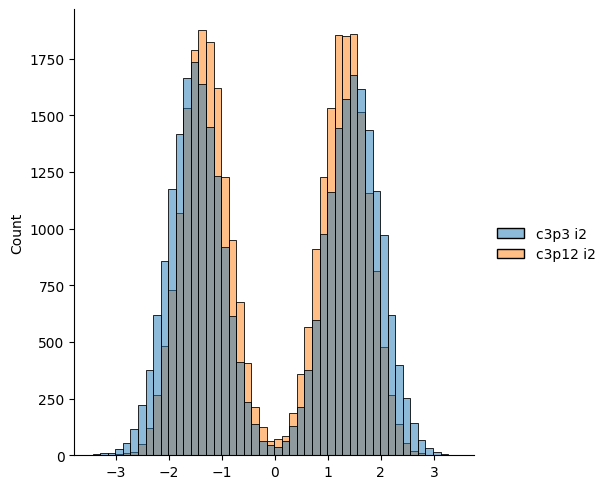

In [40]:
sns.displot({'c3p3 i2': all_posns_c3p3[:,1], 'c3p12 i2': all_posns_c3p12[:,1]})

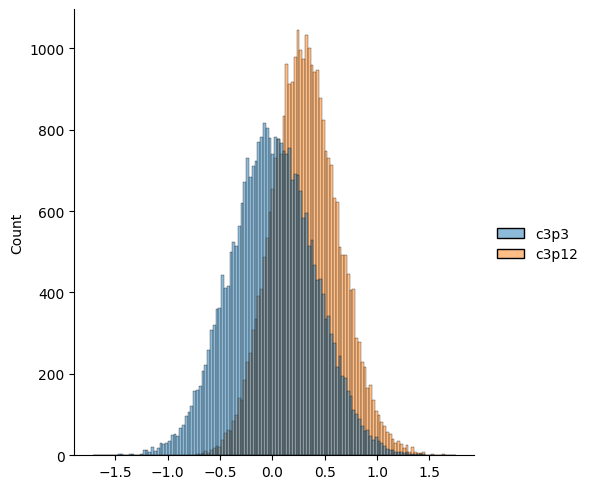

In [41]:
sns.displot({'c3p3':ak.ravel(c3p3.likability), 'c3p12':ak.ravel(c3p12.likability)})

In [42]:
print(ak.mean(ak.ravel(c3p3.likability)))
print(ak.mean(ak.ravel(c3p12.likability)))

0.0003090252740700146
0.3206951168428305


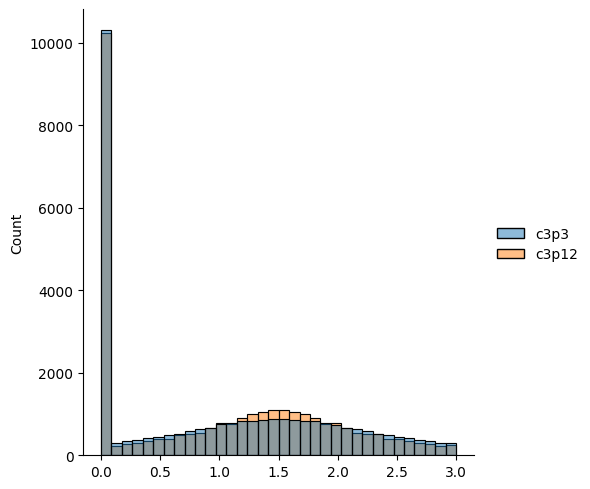

In [43]:
sns.displot({'c3p3':ak.ravel(c3p3.cand_regret), 'c3p12':ak.ravel(c3p12.cand_regret)})

In [44]:
issue_pairs = ak.combinations(c3p3.issues, n=2, axis=1)
issue_pairs[:2]

<Array [[([...], [...]), ..., (..., ...)], ...] type='2 * option[3 * (optio...'>

In [45]:
c3p3.issues[:2]

<Array [[[-1.29, 1.3], ..., [1.19, ...]], ...] type='2 * option[3 * option[...'>

In [46]:
issue_pairs_flt = ak.flatten(issue_pairs, axis=1)
print(issue_pairs_flt[:2])

[([-1.29, 1.3], [1.66, -1.69]), ([-1.29, 1.3], [1.19, ...])]


In [47]:
diffs = issue_pairs_flt["0"] - issue_pairs_flt["1"]
diffs

<Array [[-2.95, 2.99], ..., [1.31, -3.56]] type='30000 * option[2 * ?float64]'>

In [48]:
diffs**2

<Array [[8.7, 8.94], [...], ..., [1.72, 12.7]] type='30000 * option[2 * ?fl...'>

In [49]:
issue_distances = np.sqrt(ak.sum(diffs**2, axis=1))
issue_distances[:3]

<Array [4.2, 3.97, 0.479] type='3 * ?float64'>

In [50]:
issue_pairs_p10 = ak.combinations(c3p12.issues, n=2, axis=1)
issue_pairs_flt_p10 = ak.flatten(issue_pairs_p10, axis=1)
diffs_p10 = issue_pairs_flt_p10["0"] - issue_pairs_flt_p10["1"]
issue_distances_p10 = np.sqrt(ak.sum(diffs_p10**2, axis=1))

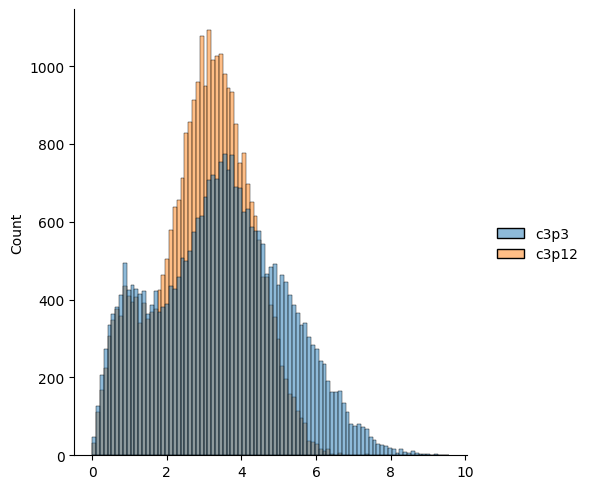

In [51]:
sns.displot({'c3p3': issue_distances, 'c3p12': issue_distances_p10})